In [1]:
#Setup relevant libraries and imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE  
import collections
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc



# Supervised Learning
from sklearn.linear_model import LogisticRegression  # Logistic Regression
from xgboost import XGBClassifier  # XGBoost

# Unsupervised Learning
from sklearn.ensemble import IsolationForest  # Isolation Forest





In [2]:
# Initial Data Visualization
df = pd.read_csv("C:\\Users\\waqas\\Downloads\\Kaggle\\creditcard.csv" ) 
df.info()
df.isnull().sum() 

# There are no missing values in the columns, therefore no data imputation required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [3]:
# understand the number of fraudulent and non fraudulent transactions

fraud_count = df[df['Class'] == 1].shape[0] # All the fraud counts
nonfraud_count = df[df['Class'] == 0].shape[0] # All the non fraud counts

print("Total Transactions: {}".format(len(df)))
print("Fraud Transactions: {}".format(fraud_count))
print("Non Fraud Transactions: {}".format(nonfraud_count))
print("Fraud Rate: {}".format(fraud_count / len(df) * 100))
#Fraud is 0.17%

Total Transactions: 284807
Fraud Transactions: 492
Non Fraud Transactions: 284315
Fraud Rate: 0.1727485630620034


In [4]:
#Feature scaling for logistic regression and xgboost

scaler = StandardScaler()
df[['Amount', 'Time']] = scaler.fit_transform(df[['Amount', 'Time']]) # Standardising the amount and time

print(df.head())

       Time        V1        V2        V3        V4        V5        V6  \
0 -1.996583 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1 -1.996583  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2 -1.996562 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3 -1.996562 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4 -1.996541 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1 -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4  0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28    Amount  Class  
0  0.12

In [5]:
#Prepare data for splitting
X = df.drop(columns=['Class']) # All the independent variables
y = df['Class'] # This is the target (dependent) variable

# Divide the data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Divide the training data  into train and validate
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, stratify=y_train, random_state=42) #stratify to  maintain ratio of class column 


print("Train set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)

Train set size: (205060, 30)
Validation set size: (22785, 30)
Test set size: (56962, 30)


In [6]:
# Due to high discrepancy is dataset thus creating imbalance, we will apply SMOTE to create synthetic data to balance it out 
#application only on Train set while keeping validation and testing set as is

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Checking before and after
print("Pre SMOTE:", collections.Counter(y_train))
print("After SMOTE:", collections.Counter(y_train_sm))

Pre SMOTE: Counter({0: 204705, 1: 355})
After SMOTE: Counter({0: 204705, 1: 102352})


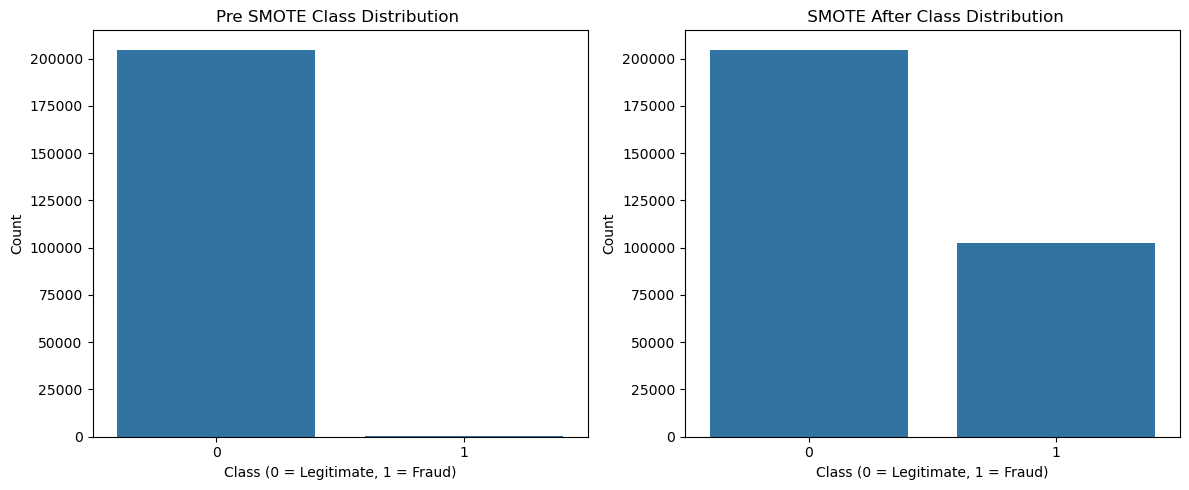

In [7]:
#Check Class Imbalances
# Pre SMOTE
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.countplot(x=y_train)
plt.title("Pre SMOTE Class Distribution ")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

# After Applying SMOTE
plt.subplot(1, 2, 2)  # Second subplot
sns.countplot(x=y_train_sm)
plt.title(" SMOTE After Class Distribution")
plt.xlabel("Class (0 = Legitimate, 1 = Fraud)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Logistic Regression Evaluation:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     22746
           1       0.06      0.82      0.11        39

    accuracy                           0.98     22785
   macro avg       0.53      0.90      0.55     22785
weighted avg       1.00      0.98      0.99     22785



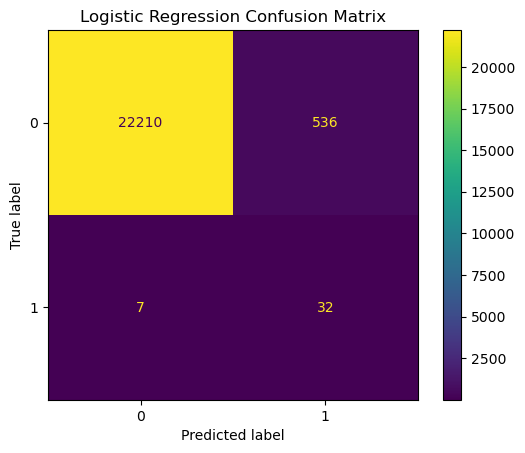

XGBoost Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.97      0.74      0.84        39

    accuracy                           1.00     22785
   macro avg       0.98      0.87      0.92     22785
weighted avg       1.00      1.00      1.00     22785



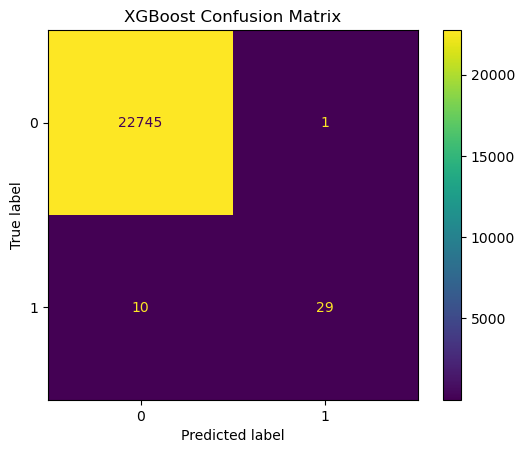

In [8]:
# Training supervised models

# Logistic Regression
# Implement early stopping to prevent overfitting
log_reg = SGDClassifier(loss="log_loss", random_state=42, class_weight='balanced', max_iter=1000, tol=1e-3, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)
log_reg.fit(X_train_res, y_train_res)

# Predict on validation dataset
y_pred_log_reg = log_reg.predict(X_val)
print("Logistic Regression Evaluation:")
print(classification_report(y_val, y_pred_log_reg))

# Develop Confusion Matrix to see FN, TP, TN, FN
conf_matrix_log_reg = confusion_matrix(y_val, y_pred_log_reg)
disp_log_reg = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_log_reg)
disp_log_reg.plot()
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# XGBoost 
xgb = XGBClassifier(random_state=42, scale_pos_weight=fraud_count/nonfraud_count, eval_metric='logloss')

# Train the model without early stopping (was not working)
xgb.fit(X_train_res, y_train_res)

# Predict on validation dataset
y_pred_xgb = xgb.predict(X_val)

# Evaluate XGBoost model
print("XGBoost Evaluation:")
print(classification_report(y_val, y_pred_xgb))

# Develop Confusion Matrix to see FN, TP, TN, FN
conf_matrix = confusion_matrix(y_val, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()


Isolation Forest Evaluation:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     22746
           1       0.00      0.00      0.00        39

    accuracy                           1.00     22785
   macro avg       0.50      0.50      0.50     22785
weighted avg       1.00      1.00      1.00     22785



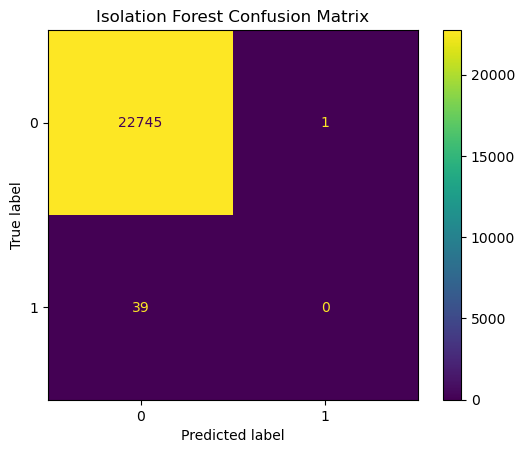

In [9]:
# Train unsupervised model

#Isolation Forest
iso_forest = IsolationForest(contamination=fraud_count/len(df), random_state=42)
iso_forest.fit(X_train_res)

# Predict on validation dataset
y_pred_iso_forest = iso_forest.predict(X_val)
y_pred_iso_forest = [1 if i == -1 else 0 for i in y_pred_iso_forest]  # Convert -1 to 1 (fraud) and 1 to 0 (non-fraud)

#  Model evaluation
print("Isolation Forest Evaluation:")
print(classification_report(y_val, y_pred_iso_forest))

# Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred_iso_forest)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot()
plt.title("Isolation Forest Confusion Matrix")
plt.show()




 Model Comparison:


,Accuracy,Precision,Recall,F1-score,AUC-ROC
Logistic Regression,0.976169,0.056338,0.820513,0.105437,0.932381
XGBoost,0.999517,0.966667,0.74359,0.84058,0.934691
Isolation Forest,0.998244,0.0,0.0,0.0,N/A


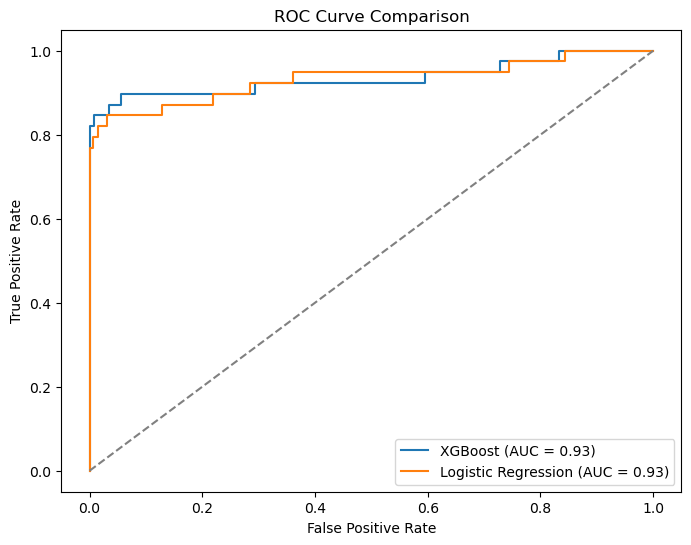

In [10]:
model_performance = {}

# Logistic Regression Evaluation
model_performance["Logistic Regression"] = {
    "Accuracy": accuracy_score(y_val, y_pred_log_reg),
    "Precision": precision_score(y_val, y_pred_log_reg, zero_division=0),
    "Recall": recall_score(y_val, y_pred_log_reg),
    "F1-score": f1_score(y_val, y_pred_log_reg),
    "AUC-ROC": roc_auc_score(y_val, log_reg.decision_function(X_val))
}

#XGBoost Evaluation
model_performance["XGBoost"] = {
    "Accuracy": accuracy_score(y_val, y_pred_xgb),
    "Precision": precision_score(y_val, y_pred_xgb, zero_division=0),
    "Recall": recall_score(y_val, y_pred_xgb),
    "F1-score": f1_score(y_val, y_pred_xgb),
    "AUC-ROC": roc_auc_score(y_val, xgb.predict_proba(X_val)[:,1])
}

#Isolation Forest Evaluation
model_performance["Isolation Forest"] = {
    "Accuracy": accuracy_score(y_val, y_pred_iso_forest),
    "Precision": precision_score(y_val, y_pred_iso_forest, zero_division=0),
    "Recall": recall_score(y_val, y_pred_iso_forest),
    "F1-score": f1_score(y_val, y_pred_iso_forest),
    "AUC-ROC": "N/A" # since its unsupervised
}


df_results = pd.DataFrame(model_performance).T
print("\n Model Comparison:")
display(df_results)


plt.figure(figsize=(8, 6))

# XGBoost ROC Curve
fpr, tpr, _ = roc_curve(y_val, xgb.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {auc(fpr, tpr):.2f})')

# Logistic Regression ROC Curve
fpr, tpr, _ = roc_curve(y_val, log_reg.decision_function(X_val))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc(fpr, tpr):.2f})')

# Random Chance Line
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
